In [11]:
import sqlite3
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### clean weather data

In [12]:
weather_mdw = pd.read_csv("MDW.csv", index_col = "Date", parse_dates = ["Date"],
                          names = ["Date", "Temperature", "Precipitation"])
weather_mdw.head()
weather_mdw = weather_mdw[["Temperature", "Precipitation"]].resample("1D").mean()
weather_mdw.to_csv("weather.csv")

### Create weather table in sqlite3

In [13]:
conn = sqlite3.connect('database.db')
print("Opened database successfully")
c = conn.cursor()
c.execute("DROP TABLE IF EXISTS WEATHER;")
c.execute('''CREATE TABLE IF NOT EXISTS WEATHER
       (DATE DATE PRIMARY KEY NOT NULL,
       TEMPERATURE REAL NOT NULL,
       PRECIPITATION REAL NOT NULL)''')
print("Table created successfully")
conn.commit()
conn.close()

Opened database successfully
Table created successfully


### Insert records

In [14]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
mdw_csv = open("weather.csv", "r")
mdw_csv.readline()
for line in mdw_csv:
    line = line.strip()
    arr = line.split(",")
    try:
        c.execute("INSERT INTO  WEATHER(DATE,TEMPERATURE,PRECIPITATION) VALUES (?,?,?)",(arr[0], arr[1], arr[2]));
    except Exception as e:
        pass
conn.commit()
print("Records created successfully")
conn.close()

Opened database successfully
Records created successfully


### clean violation data

In [18]:
vdf_csv = open("Export_Output.csv", "r")
output = open("violation.csv", "w")
vdf_csv.readline()
for line in vdf_csv:
    line = line.strip()
    arr = line.split(",")
    dt = datetime.strptime(arr[3],"%m/%d/%Y %H:%M")
    arr[3] = dt.strftime("%Y-%m-%d")
    output.write(",".join(arr) + "\n")
output.close()
print("done")

done


### Create violation table in sqlite3

In [19]:
conn = sqlite3.connect('database.db')
print("Opened database successfully")
c = conn.cursor()
c.execute("DROP TABLE IF EXISTS VIOLATION;")
c.execute('''CREATE TABLE VIOLATION
       (CAMERAID INTEGER NOT NULL,
       DATE DATE NOT NULL,
       INTER TEXT,
       ADDRESS TEXT,
       VIOLATION INTEGER,
       LATITUDE REAL,
       LONGITUDE REAL,
       ZIPCODE INTEGER NOT NULL,
       PRIMARY KEY(CAMERAID, DATE)
       )''')
print("Table created successfully")
conn.commit()
conn.close()

Opened database successfully
Table created successfully


### Insert records

In [20]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
mdw_csv = open("violation.csv", "r")
mdw_csv.readline()
for line in mdw_csv:
    line = line.strip()
    arr = line.split(",")
    try:
        c.execute("INSERT INTO  VIOLATION(CAMERAID, DATE,INTER, ADDRESS, VIOLATION, LATITUDE, LATITUDE, ZIPCODE) \
                  VALUES (?,?,?,?,?,?,?,?)",(arr[1], arr[3], arr[0], arr[2],arr[4], arr[5], arr[6], arr[7]));
    except Exception as e:
        pass
conn.commit()
print("Records created successfully")
conn.close()

Opened database successfully
Records created successfully


### zipcode和violation的关系

Opened database successfully
Operation done successfully
48


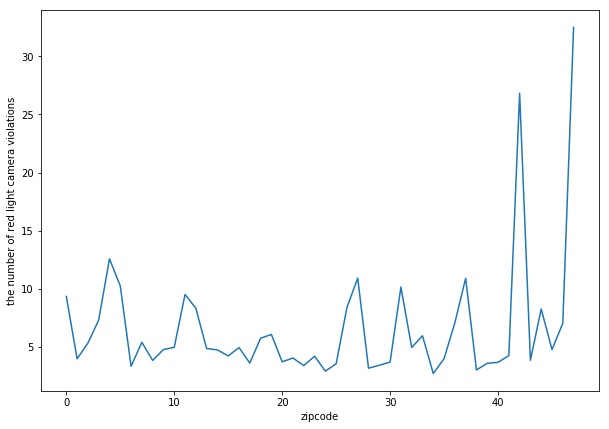

In [66]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select zipcode, avg(violation) as violation \
from weather as w join violation as v on w.DATE=v.DATE group by zipcode order by zipcode;")
zipcodes = []
violations = []
for row in cursor:
    zipcodes.append(row[0])
    violations.append(float(row[1]))
print("Operation done successfully")
print(len(violations))
conn.close()
plt.figure(figsize=(10,7))
#plt.xticks(range(len(zipcodes)),zipcodes)
plt.xlabel("zipcode")
plt.ylabel("the number of red light camera violations")
plt.plot(range(len(violations)), violations)
plt.show()

### 每一年圣诞节（2014.12.24/2015.12.24/2015.12.24）

45 45 45 45


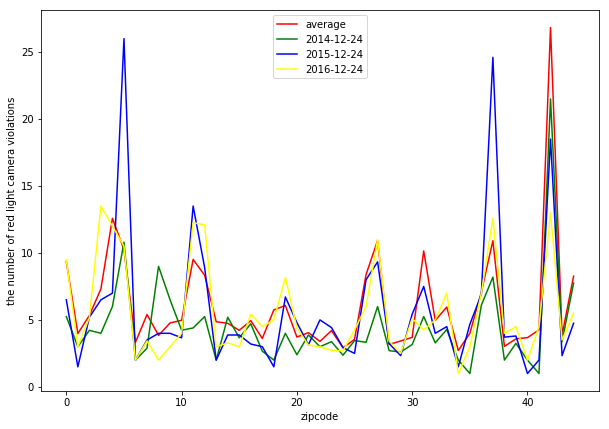

In [78]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

zipcodes = []
violations4=[]
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    zipcodes.append(row[0])
    violations4.append(float(row[1]))
    
violations1 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2014-12-24'and zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    violations1.append(float(row[1]))

violations2 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2015-12-24' and zipcode <=60660  group by zipcode order by zipcode;")
for row in cursor:
    violations2.append(float(row[1]))

violations3 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-12-24' and zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    violations3.append(float(row[1]))    
print(len(violations4),len(violations1), len(violations2),len(violations3))
conn.close()
plt.figure(figsize=(10,7))
#plt.xticks(range(len(zipcodes)),zipcodes)
plt.xlabel("zipcode")
plt.ylabel("the number of red light camera violations")
plt.plot(range(len(violations4)), violations4,c='red',label='average')
plt.plot(range(len(violations1)), violations1,c='green',label='2014-12-24')
plt.plot(range(len(violations2)), violations2,c='blue',label='2015-12-24')
plt.plot(range(len(violations3)), violations3,c='yellow',label='2016-12-24')
plt.legend()
plt.show()

### Cubs 夺冠时间和violation的关系

45 45 45 45


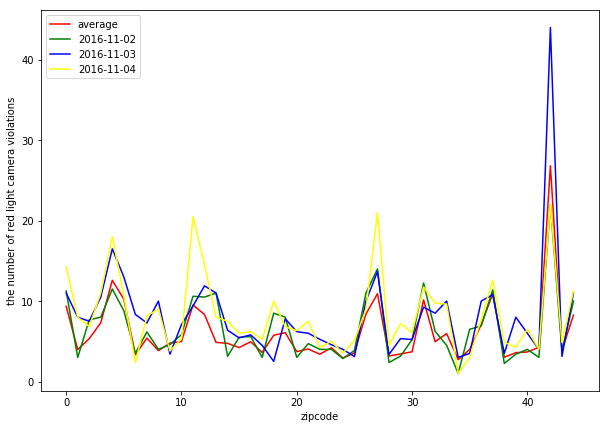

In [106]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

zipcodes = []
violations4=[]
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    zipcodes.append(row[0])
    violations4.append(float(row[1]))
    
violations5 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-02'and zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    violations5.append(float(row[1]))

violations6 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-03' and zipcode <=60660  group by zipcode order by zipcode;")
for row in cursor:
    violations6.append(float(row[1]))

violations7 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-04' and zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    violations7.append(float(row[1]))    
print(len(violations4),len(violations5), len(violations6),len(violations7))

conn.close()
plt.figure(figsize=(10,7))
#plt.xticks(range(len(zipcodes)),zipcodes)
plt.xlabel("zipcode")
plt.ylabel("the number of red light camera violations")
plt.plot(range(len(violations4)), violations4,c='red',label='average')
plt.plot(range(len(violations5)), violations5,c='green',label='2016-11-02')
plt.plot(range(len(violations6)), violations6,c='blue',label='2016-11-03')
plt.plot(range(len(violations7)), violations7,c='yellow',label='2016-11-04')
plt.legend()
plt.show()

### 每一年感恩节和violation的关系

45 45 45 45


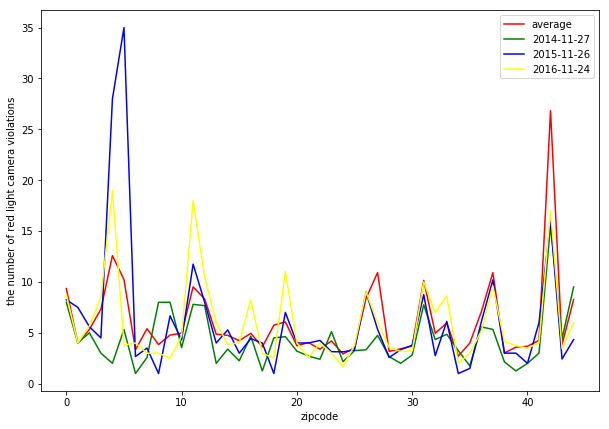

In [108]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

zipcodes = []
violations4=[]
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    zipcodes.append(row[0])
    violations4.append(float(row[1]))
    
violations8 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2014-11-27'and zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    violations8.append(float(row[1]))

violations9 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2015-11-26' and zipcode <=60660  group by zipcode order by zipcode;")
for row in cursor:
    violations9.append(float(row[1]))

violations10 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-24' and zipcode <=60660 group by zipcode order by zipcode;")
for row in cursor:
    violations10.append(float(row[1]))    
print(len(violations4),len(violations8), len(violations9),len(violations10))

conn.close()
plt.figure(figsize=(10,7))
#plt.xticks(range(len(zipcodes)),zipcodes)
plt.xlabel("zipcode")
plt.ylabel("the number of red light camera violations")
plt.plot(range(len(violations4)), violations4,c='red',label='average')
plt.plot(range(len(violations8)), violations8,c='green',label='2014-11-27')
plt.plot(range(len(violations9)), violations9,c='blue',label='2015-11-26')
plt.plot(range(len(violations10)), violations10,c='yellow',label='2016-11-24')
plt.legend()
plt.show()

### 日期和violation的关系

Opened database successfully
Operation done successfully


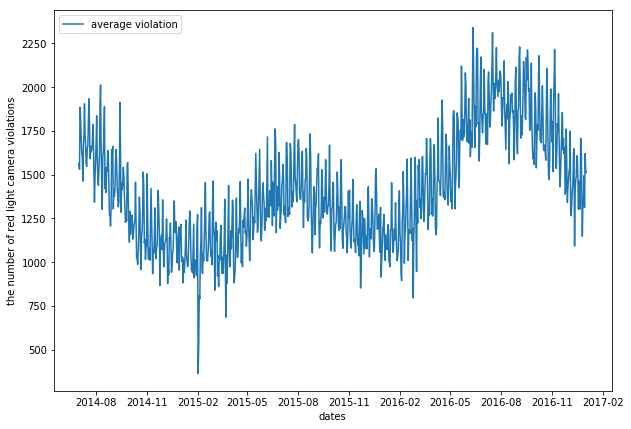

In [79]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, sum(violation) as violation from weather as w join violation as v \
                   on w.DATE=v.DATE group by w.DATE ORDER BY w.DATE")
dates = []
violations = []
for row in cursor:
    current_date=datetime.strptime(row[0],"%Y-%m-%d")
    dates.append(current_date)
    violations.append(float(row[1]))
print("Operation done successfully")
conn.close()
plt.figure(figsize=(10,7))
#plt.xticks(range(len(zipcodes)),zipcodes)
plt.xlabel("dates")
plt.ylabel("the number of red light camera violations")
plt.plot(dates,violations,label='average violation')
plt.legend()
plt.show()

### Regression

In [103]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, sum(violation), w.TEMPERATURE,w.PRECIPITATION from weather as w join \
violation as v on w.DATE=v.DATE group by w.DATE order by w.DATE;")
dates = []
violations = []
temps = []
precs = []
for row in cursor:
    dates.append(row[0])
    violations.append(float(row[1]))
    temps.append(float(row[2]))
    precs.append(float(row[3]))
print("Operation done successfully")
conn.close()

d={'date': dates, 'violation': violations,'temprature': temps,'precipitation': precs}
df=pd.DataFrame(data=d)
print(df.head())

import statsmodels.formula.api as sm

result = sm.ols(formula="violation~ temprature+ precipitation", data=df).fit()
result.summary()

Opened database successfully
Operation done successfully
         date  precipitation  temprature  violation
0  2014-07-01       0.140000   72.295745     1564.0
1  2014-07-02       0.002414   68.200000     1530.0
2  2014-07-03       0.005333   63.496667     1886.0
3  2014-07-04       0.000000   70.066667     1819.0
4  2014-07-05       0.000000   72.029167     1723.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              violation   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     70.89
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           2.40e-29
Time:                        14:30:49   Log-Likelihood:                -6510.3
No. Observations:                 916   AIC:                         1.303e+04
Df Residuals:                     913   BIC:                         1.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1219.9670     19.186     63.585      0.000    1182.312    1257.622
temprature        3.6908      0.313     11.775      0.000       3.076       4.306
precipitation    49.1304    522.450      0.094      0.925    -976.212    1074.473
==============================================================================
Omnibus:                      166.794   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.237
Skew:                           0.909   Prob(JB):                    7.07e-106
Kurtosis:                       6.063   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""